In [48]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import math
import os
from scipy.optimize import minimize

# Benchmark 1
Seja a função
\begin{equation}
f(x_1,x_2)  = -(x_1 - c_1)^2 - (x_2 - c_2)^2 - c , \tag{Função Benchmark 1}
\end{equation}
com as contantes definidas $c_1=2$, $c_2=2$, e $c=5$. O gráfico desta função será mostrado na figura abaixo.

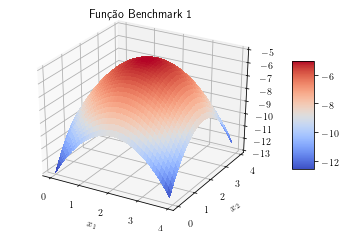

In [49]:
def func_b1(x, c1, c2, c):
    z = -(x[0] - c1)**2 - (x[1] - c2)**2 - c
    return z
def func_b1_minimize(x, c1, c2, c):
    z = (x[0] - c1)**2 + (x[1] - c2)**2 + c
    return z
plt.rc('text', usetex=True)
fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.arange(0, 4, 0.1)
y = np.arange(0, 4 , 0.1)
x1, y1 = np.meshgrid(y, x)
dimx = x.shape
dimy = y.shape
n = dimx[0]
m = dimy[0]
s = (n, m)
z = np.zeros(s)
x0 = np.array([0.0, 0.0])
# Parameters
c1 = 2
c2 = 2
c  = 5
for i in range(0, n):
    for j in range(0, m):
        x0[0] = x[i]
        x0[1] = y[j]
        z[i][j] = func_b1(x0, c1, c2, c)
#        
surf = ax.plot_surface(x1, y1, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Função Benchmark 1')
#Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


A função atinge o máximo no ponto $(x_1,x_2)=(2, 2)$ com valor $f(2, 2)=5$. O método de otimização utilizado é o BFGS, e o pacote usado é Scipy. Veja   https://docs.scipy.org/doc/scipy/reference/optimize.html. Obs: É usado a função com o sinal invertido pois usamos a subrotina minimize do pacote Scipy.

In [50]:
x0 = np.array([0.0, 0.0])
res = minimize(func_b1_minimize, x0, args=(c1, c2, c),  method='BFGS', options={'disp': False})
print(res)

      fun: 5.0000000000000515
 hess_inv: array([[ 0.74999998, -0.25000002],
       [-0.25000002,  0.74999998]])
      jac: array([-2.98023224e-07, -2.98023224e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999984, 1.99999984])


Analisando a saída do algoritmo, podemos constatar que o BFGS aproximou o valor máximo da função no ponto $(x_1, x_2)=(2, 2)$, cujo valor é $f(2,2)=5$.

Agora, será testado o algoritmo usando as seguintes definições.

Vetor gradiente da função $f$:
\begin{equation}
\begin{bmatrix}
\frac{\partial f(x_1,x_2)}{\partial x_1}\\
\frac{\partial f(x_1,x_2)}{\partial x_2}\\
\end{bmatrix}=
\begin{bmatrix}
-2(x_1 - c_1)\\
-2(x_2 - c_2)\\
\end{bmatrix}
\end{equation}

Matriz hessiana da função $f$ :
\begin{equation}
\begin{bmatrix}
\frac{\partial^2 f(x_1,x_2)}{\partial x_1^2}  &\frac{\partial^2 f(x_1,x_2)}{\partial x_1\partial x_2}\\
\frac{\partial^2 f(x_1,x_2)}{\partial x_2\partial x_1} &\frac{\partial^2 f(x_1,x_2)}{\partial x_2^2} \\
\end{bmatrix}
=
\begin{bmatrix}
-2   &  0\\
 0   & -2\\
\end{bmatrix}
\end{equation}

In [47]:
# OBS: Minimizar -f
def grad_b1(x, c1, c2, c):
    grad    = np.zeros(2)
    grad[0] = 2 * (x[0] - c1)
    grad[1] = 2 * (x[1] - c2)
    return grad
x0 = np.array([0.0, 0.0])
res = minimize(func_b1_minimize, x0, args=(c1, c2, c), method='BFGS', jac=grad_b1)
res

      fun: 5.0
 hess_inv: array([[ 0.75, -0.25],
       [-0.25,  0.75]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2., 2.])

# Benchmark 2
No segundo Benchmark é usado a função de Rosenbrock. 
\begin{equation}
f(x_1,x_2)  = (1 - x_1)^2 + 100 (x_2 - x_1^2)^2 , \tag{Função Benchmark 2}
\end{equation}
abaixo está o gráfico da função de Rosenbrock.

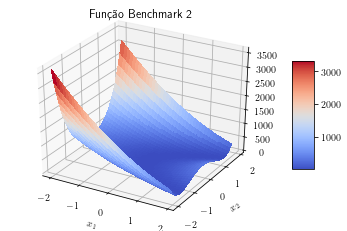

In [28]:
def func_b2(x):
    # Rosenbroke function
    return (1 - x[0])**2 + 100* ((x[1] - x[0]**2))**2
#
plt.rc('text', usetex=True)
fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2 , 0.1)
x1, y1 = np.meshgrid(y, x)
dimx = x.shape
dimy = y.shape
n = dimx[0]
m = dimy[0]
s = (n, m)
z = np.zeros(s)
x0 = np.array([0.0, 0.0])
# Parameters
for i in range(0, n):
    for j in range(0, m):
        x0[0] = x[i]
        x0[1] = y[j]
        z[i][j] = func_b2(x0)
#        
surf = ax.plot_surface(x1, y1, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Função Benchmark 2')
#Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


A função atinge o máximo no ponto $(x_1,x_2)=(1, 1)$ com valor $f(1, 1)=0$. O método de otimização utilizado é o BFGS, e o pacote usado é Scipy. Veja   https://docs.scipy.org/doc/scipy/reference/optimize.html. 

In [5]:
x0 = np.array([0.0, 0.0])
res = minimize(func_b2, x0,  method='BFGS', options={'disp': False})
print(res)

      fun: 2.8440316101421118e-11
 hess_inv: array([[0.49482454, 0.98957634],
       [0.98957634, 1.98394215]])
      jac: array([ 3.98673709e-06, -2.84416559e-06])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999467, 0.99998932])


Analisando a saída do algoritmo, podemos constatar que o BFGS aproximou o ponto que a função atinge o mínimo $(x_1, x_2)=(1, 1)$, e o valor mínimo da função no ponto $f(1,1)=0$.

Agora, será testado o algoritmo usando as seguintes definições.

Vetor gradiente para a função Rosenbrock:
\begin{equation}
\begin{bmatrix}
\frac{\partial f(x_1,x_2)}{\partial x_1}\\
\frac{\partial f(x_1,x_2)}{\partial x_2}\\
\end{bmatrix}=
\begin{bmatrix}
-2(1 - x_1)-400(x_2-x_1^2)x_1\\
200(x_2 -x_1^2 )\\
\end{bmatrix}
\end{equation}

Matriz hessiana para a função Rosenbrock:
\begin{equation}
\begin{bmatrix}
\frac{\partial^2 f(x_1,x_2)}{\partial x_1^2}  &\frac{\partial^2 f(x_1,x_2)}{\partial x_1\partial x_2}\\
\frac{\partial^2 f(x_1,x_2)}{\partial x_2\partial x_1} &\frac{\partial^2 f(x_1,x_2)}{\partial x_2^2} \\
\end{bmatrix}
=
\begin{bmatrix}
2-400(x_2-3x_1^2)   &  -400x_1\\
 -400x_1   & 200\\
\end{bmatrix}
\end{equation}

In [52]:
# Gradiente para a função de Rosenbrock
def grad_b2(x):
    grad    = np.zeros(2)
    grad[0] = -2 * (1 - x[0]) - 400 * (x[1] - x[0]**2) * x[0]
    grad[1] =  200 * (x[1] - x[0]**2)
    return grad
x0 = np.array([0.0, 0.0])
res = minimize(func_b2, x0, method='BFGS', jac=grad_b2)
res

      fun: 7.717288356613562e-13
 hess_inv: array([[0.49480256, 0.98953879],
       [0.98953879, 1.98387918]])
      jac: array([ 3.92841201e-06, -2.83120873e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999913, 0.99999825])

# Encontrar o ponto de máximo para a pdf $\Gamma$ do artigo enviado para a revista GRSL

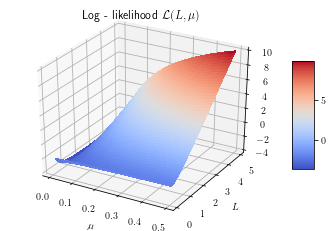

In [15]:
# Function Definition (obs: The sign was changed because we was doing miminization )
def func_pdf_gamma(x, sigma1, sigma2):
            aux1 = x[0] * np.log(x[0] / x[1])
            aux2 = (x[0] - 1) * sigma1
            aux3 =  np.log(math.gamma(x[0]))
            aux4 = (x[0] / x[1]) * sigma2
            z =  - (aux1 + aux2 - aux3 - aux4)
            return z
#
plt.rc('text', usetex=True)
fig = plt.figure()
ax = fig.gca(projection='3d')
# Make a read
os.chdir("/home/aborba/ufal_mack/Code/Code_igarss_2021/Data")
f = open("Phantom_gamf_0.000_1_2_3.txt","r")
os.chdir("/home/aborba/ufal_mack/Code/Code_igarss_2021/Code_python")
# Make manipulation of the files
mat = np.loadtxt(f)
dim = mat.shape[1]
sig = np.zeros(dim)
for i in range(dim):
        sig[i] = mat[149][i]
# Make data
x = np.arange(0.1, 5, 0.1)
y = np.arange(0.005, 0.5 , 0.01)
x1, y1 = np.meshgrid(y, x)
dimx = x.shape
dimy = y.shape
n = dimx[0]
m = dimy[0]
l = 1
sigma1 = sum(np.log(sig[0:l])) / l 
sigma2 = sum(sig[0:l]) / l
#gamma = np.zeros(n)
#for i in range(n):
#    gamma[i] = math.gamma(x[i])
s = (n, m)
z = np.zeros(s)
x0 = np.array([0.0, 0.0])
for i in range(0, n):
    for j in range(0, m):
        x0[0] = x[i]
        x0[1] = y[j]
        z[i][j] = func_pdf_gamma(x0, sigma1, sigma2)
#        
surf = ax.plot_surface(x1, y1, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#
plt.xlabel(r'$\mu$')
plt.ylabel(r'$L$')
plt.title(r'Log - likelihood $\mathcal{L}(L,\mu)$')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
#
#x0 = np.array([1.0, 1.0])
#res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
#               options={'disp': True})
#res = minimize(func_pdf_gamma, x0, method='BFGS',
#               options={'disp': True})

In [16]:
el = 1
emu = sigma2 = sum(sig[0:l]) / l
x0 = np.array([el, emu])
print(emu)
res = minimize(func_pdf_gamma, x0, args=(sigma1, sigma2), method='BFGS', options={'disp': False})
print(res)

0.009449


OverflowError: math range error